In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')

In [2]:
# goal is to separate customers into different categories (clusters) based 
# on their annual income and spending score => unsupervised learning
df = pd.read_csv('../datasets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = df.iloc[:, [3, 4]].values

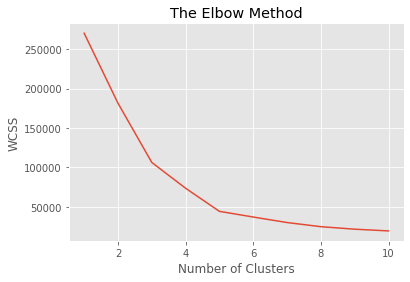

In [8]:
# using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

# WCSS (within cluster sum os squares) => we can use WCSS to determine the optimal (or at least 
# close to optimal) number of clusters. As we are increasing the number of clusters, WCSS
# is getting smaller and smaller so we need to be careful no to overshoot it. Basically,
# when we have the same number of centroids as the number of observations, WCSS will be 0.

# Using elbow method, we can determine when to stop adding more clusters.

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# The right amount of clusters seems to be 5 from the above graph
# Applying k-means to the mall datasets

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

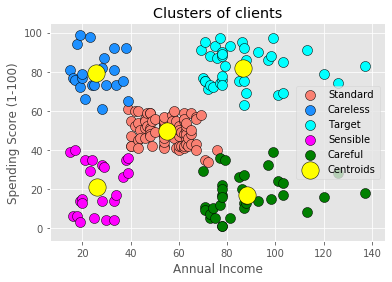

In [32]:
# visualizing the cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 100, c='salmon', label='Standard', edgecolors='k')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 100, c='dodgerblue', label='Careless', edgecolors='k')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 100, c='cyan', label='Target', edgecolors='k')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s= 100, c='magenta', label='Sensible', edgecolors='k')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s= 100, c='green', label='Careful', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolors='k')
plt.title('Clusters of clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()